# Exploratory Data Analysis of the West Nile Virus problem dataset


From the [Kaggle](https://www.kaggle.com/c/predict-west-nile-virus) website:

> West Nile virus is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death. 

> By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today. Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations.

In this notebook I will perform a detailed exploratory data analysis of the Kaggle West Nile virus dataset.

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

## Importing the data

In [2]:
weather = pd.read_csv('weather.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
spray = pd.read_csv('spray.csv')

## Data dictionary

#### train.csv and test.csv

- Id: the id of the record
- Date: date that the WNV test is performed
- Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
- Species: the species of mosquitos
- Block: block number of address
- Street: street name
- Trap: Id of the trap
- AddressNumberAndStreet: approximate address returned from GeoCoder
- Latitude, Longitude: Latitude and Longitude returned from GeoCoder
- AddressAccuracy: accuracy returned from GeoCoder
- NumMosquitos: number of mosquitoes caught in this trap
- WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 

#### spray.csv 

- Date, Time: the date and time of the spray
- Latitude, Longitude: the Latitude and Longitude of the spray


#### weather.csv 
- Column descriptions in noaa_weather_qclcd_documentation.pdf. 

## Function to perform some steps of the EDA:

In [3]:
def eda(df):
    print("1) Are there missing values:")
    if df.isnull().any().unique().shape[0] == 2:
        if df.isnull().any().unique()[0] == False and df.isnull().any().unique()[1] == False:
            print('No\n')
        else:
            print("Yes|Percentage of missing values in each column:\n",df.isnull().sum()/df.shape[0],'\n')
    elif df.isnull().any().unique().shape[0] == 1:
        if df.isnull().any().unique() == False:
            print('No\n')
        else:
            print("Yes|Percentage of missing values in each column:\n",df.isnull().sum()/df.shape[0],'\n')

    print("2) Which are the data types:\n")
    print(df.dtypes,'\n')
    print("3) Dataframe shape:",df.shape)
    print("4) Unique values per columm")
    for col in df.columns.tolist():
        print (col,":",df[col].nunique())  
    return

## Looking at `train` `DataFrame`:

In [6]:
train = pd.read_csv('train.csv')
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


## Using `pandas-profiling` to elimite highly correlated features

In [9]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(train)
profile

Number of variables,12
Number of observations,10506
Total Missing (%),0.0%
Total size in memory,985.0 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [10]:
rejected_variables = profile.get_rejected_variables(threshold=0.9)
rejected_variables

[]

## Feature to keep
- Address features are redundant and some of them can be removed
- `NumMosquitos` and `WnvPresent` are not in the test set. I will remove the first since the number of mosquitos is less relevant than whether West Nile Virus was present in these mosquitos.

In [11]:
cols_to_keep = ['Date', 'Species', 'Trap','Latitude', 'Longitude', 'WnvPresent']
train = train[cols_to_keep]
train.head()

,Date,Species,Trap,Latitude,Longitude,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,0


## Using the argument `df` equal to the training set `train`

In [12]:
eda(train)

1) Are there missing values:
No

2) Which are the data types:

Date           object
Species        object
Trap           object
Latitude      float64
Longitude     float64
WnvPresent      int64
dtype: object 

3) Dataframe shape: (10506, 6)
4) Unique values per columm
Date : 95
Species : 7
Trap : 136
Latitude : 138
Longitude : 138
WnvPresent : 2


## Comments
- Only `Species` can be transformed into dummies. The others have too many unique values.
- We should examine categorical columns to see if they are unbalanced. Using `value_counts` we find that the `WnvPresent` column is highly unbalanced with $\approx$ 95$\%$ of zeros.

In [13]:
import auxiliar_v2 as aux
s = round(100*train['WnvPresent'].value_counts()/train.shape[0],0)
aux.s_to_df(s,'WnvPresent','Yes/No')

,WnvPresent
Yes/No,
0,95.0
1,5.0


In [14]:
train.to_csv('train_new.csv')

## Creating dummies from `Species` and tranforming dates to `Datetime`

In [15]:
train = pd.read_csv('train_new.csv',index_col=0)
train['Date'] = pd.to_datetime(train['Date'])
train = pd.concat([train,pd.get_dummies(train['Species'], drop_first = True)], axis = 1)
train.drop('Species', inplace=True, axis=1)
train.head()
train.dtypes

,Date,Trap,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,2007-05-29,T002,41.954690,-87.800991,0,0,1,0,0,0,0
1,2007-05-29,T002,41.954690,-87.800991,0,0,0,1,0,0,0
2,2007-05-29,T007,41.994991,-87.769279,0,0,0,1,0,0,0
3,2007-05-29,T015,41.974089,-87.824812,0,0,1,0,0,0,0
4,2007-05-29,T015,41.974089,-87.824812,0,0,0,1,0,0,0


Date                      datetime64[ns]
Trap                              object
Latitude                         float64
Longitude                        float64
WnvPresent                         int64
CULEX PIPIENS                      uint8
CULEX PIPIENS/RESTUANS             uint8
CULEX RESTUANS                     uint8
CULEX SALINARIUS                   uint8
CULEX TARSALIS                     uint8
CULEX TERRITANS                    uint8
dtype: object

## Build a `DataFrame` with the dates broken into pieces

In [16]:
train2 = train.copy()
train2['Year']= train2.Date.dt.year
train2['DayofYear']= train2.Date.dt.dayofyear
train2.drop('Date', inplace=True, axis=1)  
train2.head()

,Trap,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,Year,DayofYear
0,T002,41.954690,-87.800991,0,0,1,0,0,0,0,2007,149
1,T002,41.954690,-87.800991,0,0,0,1,0,0,0,2007,149
2,T007,41.994991,-87.769279,0,0,0,1,0,0,0,2007,149
3,T015,41.974089,-87.824812,0,0,1,0,0,0,0,2007,149
4,T015,41.974089,-87.824812,0,0,0,1,0,0,0,2007,149


## Exporting `train` and `train2` after EDA

The `DataFrame` with the full `Date` is kept because it may be useful for merging different dataframes. Hence:
- `'train_after_eda.csv'` has a `Date` column
- `'train_after_eda_without_date.csv'` has no `Date` column but columns `Year` and `DayofYear`

In [17]:
train.to_csv('train_after_eda.csv')
train2.to_csv('train_after_eda_without_date.csv')

## Applying similar changes to the test data

In [18]:
cols_to_keep_test = ['Date', 'Species','Trap', 'Latitude', 'Longitude']

In [20]:
test = pd.read_csv('test.csv')
test['Date'] = pd.to_datetime(test['Date'])
test = test[cols_to_keep_test]
test.head()

,Date,Species,Trap,Latitude,Longitude
0,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991
1,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991
2,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991
3,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991
4,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991


In [21]:
test = pd.concat([test,pd.get_dummies(test['Species'], drop_first = True)], axis = 1)
test.drop('Species', inplace=True, axis=1)
test.head()

,Date,Trap,Latitude,Longitude,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX
0,2008-06-11,T002,41.95469,-87.800991,0,1,0,0,0,0,0
1,2008-06-11,T002,41.95469,-87.800991,0,0,1,0,0,0,0
2,2008-06-11,T002,41.95469,-87.800991,1,0,0,0,0,0,0
3,2008-06-11,T002,41.95469,-87.800991,0,0,0,1,0,0,0
4,2008-06-11,T002,41.95469,-87.800991,0,0,0,0,0,1,0


### Build a `DataFrame` with the dates broken into pieces

In [22]:
test2 = test.copy()
test2['Year']= test2.Date.dt.year
test2['DayofYear']= test2.Date.dt.dayofyear
test2.drop('Date', inplace=True, axis=1)  
test2.head()

,Trap,Latitude,Longitude,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX,Year,DayofYear
0,T002,41.95469,-87.800991,0,1,0,0,0,0,0,2008,163
1,T002,41.95469,-87.800991,0,0,1,0,0,0,0,2008,163
2,T002,41.95469,-87.800991,1,0,0,0,0,0,0,2008,163
3,T002,41.95469,-87.800991,0,0,0,1,0,0,0,2008,163
4,T002,41.95469,-87.800991,0,0,0,0,0,1,0,2008,163


### Exporting `test` and `test2` after EDA

In [23]:
test.to_csv('test_after_eda.csv')
test2.to_csv('test_after_eda_without_date.csv')

## Now, we look at the `spray` data and perform similar steps:

In [24]:
spray = pd.read_csv('spray.csv')
spray['Date'] = pd.to_datetime(spray['Date'])
spray.head()
spray.dtypes

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
dtype: object

## Printing out the `DataFrame` we see that there are several `NaNs` but the percentage is low. 

In [26]:
aux.s_to_df(spray.isnull().sum(),'NaNs','Features')
spray[spray['Time'].isnull()].head()
print('% of NaNs in the `Time` column:',round(spray[spray['Time'].isnull()].shape[0]/spray.shape[0],2))

,NaNs
Features,
Date,0
Time,584
Latitude,0
Longitude,0


,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014


% of NaNs in the `Time` column: 0.04


## Remove `Time` column altogether. 

In [27]:
spray.drop('Time', inplace=True, axis=1)
spray.head()

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [28]:
aux.s_to_df(spray.isnull().sum(),'NaNs','Features')

,NaNs
Features,
Date,0
Latitude,0
Longitude,0


In [29]:
spray2 = spray.copy()
spray2['Year']= spray2.Date.dt.year
spray2['DayofYear']= spray2.Date.dt.dayofyear
spray2.drop('Date', inplace=True, axis=1)  
spray2.head()

,Latitude,Longitude,Year,DayofYear
0,42.391623,-88.089163,2011,241
1,42.391348,-88.089163,2011,241
2,42.391022,-88.089157,2011,241
3,42.390637,-88.089158,2011,241
4,42.390410,-88.088858,2011,241


In [30]:
spray.to_csv('spray_after_eda.csv')
spray2.to_csv('spray_after_eda_without_date.csv')

## Looking at the `weather` `DataFrame`:

In [36]:
weather = pd.read_csv('weather.csv')

## The `Water1` column has just 1 value namely  `M` and the latter means missing. We remove this column.

In [37]:
weather['Water1'].value_counts()
weather['Water1'].nunique()
weather['Water1'].unique()
weather.drop('Water1', inplace=True, axis=1)

M    2944
Name: Water1, dtype: int64

1

array(['M'], dtype=object)

## The `Depth` column has just two values namely 0 and `M` and the latter means missing. We remove this column.

In [38]:
aux.s_to_df(weather['Depth'].value_counts(),'value_counts','features')
weather['Depth'].nunique()
weather['Depth'].unique()
weather.drop('Depth', inplace=True, axis=1)

,value_counts
features,
M,1472
0,1472


2

array(['0', 'M'], dtype=object)

## Converting dates into `datetime`:

In [39]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [40]:
weather.to_csv('weather_new.csv')

## Concerning stations 1 and 2

- As we saw above, there are two types of `Station`, namely, 1 and 2.

### From Kaggle's Website Weather Data:

- Hot and dry conditions are more favorable for West Nile virus than cold and wet. 
- We provide you with the dataset from NOAA of the weather conditions of 2007 to 2014, during the months of the tests. 

    - Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
    - Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
    
- Each date had 2 records, 1 for each `Station=1` and other for `Station=2`. However as we shall see most missing values are in the latter which we will drop.

In [41]:
weather['Station'].value_counts()
weather['Station'].unique()

1    1472
2    1472
Name: Station, dtype: int64

array([1, 2])

### The `for` below searches each column for data that cannot be converted to numbers:

In [42]:
cols_to_keep = ['Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', \
                'Cool', 'Sunrise', 'Sunset', 'SnowFall', \
                'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']

In [43]:
print('Columns with non-convertibles:\n')
for station in [1,2]:
    print('Station',station,'\n')
    weather_station = weather[weather['Station']==station]
    for col in weather_station[cols_to_keep]:
        for x in sorted(weather_station[col].unique()):
            try:
                x = float(x)
            except:
                print(col,'| Non-convertibles, their frequency and their station:',\
                      (x,weather_station[weather_station[col] == x][col].count()))
    print("")

Columns with non-convertibles:

Station 1 

WetBulb | Non-convertibles, their frequency and their station: ('M', 3)
SnowFall | Non-convertibles, their frequency and their station: ('  T', 12)
PrecipTotal | Non-convertibles, their frequency and their station: ('  T', 163)
StnPressure | Non-convertibles, their frequency and their station: ('M', 2)
SeaLevel | Non-convertibles, their frequency and their station: ('M', 5)

Station 2 

Tavg | Non-convertibles, their frequency and their station: ('M', 11)
Depart | Non-convertibles, their frequency and their station: ('M', 1472)
WetBulb | Non-convertibles, their frequency and their station: ('M', 1)
Heat | Non-convertibles, their frequency and their station: ('M', 11)
Cool | Non-convertibles, their frequency and their station: ('M', 11)
Sunrise | Non-convertibles, their frequency and their station: ('-', 1472)
Sunset | Non-convertibles, their frequency and their station: ('-', 1472)
SnowFall | Non-convertibles, their frequency and their statio

In [44]:
weather.to_csv('weather_new_2.csv')

## Indeed, as stated above, most missing values are in the station 2. We will there drop rows with `Station=2`

In [45]:
weather = weather[weather['Station'] == 1]
weather.dtypes
weather['Station'].unique()
del weather['Station']

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
Depart                 object
DewPoint                int64
WetBulb                object
Heat                   object
Cool                   object
Sunrise                object
Sunset                 object
CodeSum                object
SnowFall               object
PrecipTotal            object
StnPressure            object
SeaLevel               object
ResultSpeed           float64
ResultDir               int64
AvgSpeed               object
dtype: object

array([1])

## Only for station 1 we have:

In [46]:
print('Columns with non-convertibles:\n')
for col in weather[cols_to_keep]:
    for x in sorted(weather[col].unique()):
        try:
            x = float(x)
        except:
            print(col,'| Non-convertibles, their frequency and their station:',
                  (x,weather[weather[col] == x][col].count()))

Columns with non-convertibles:

WetBulb | Non-convertibles, their frequency and their station: ('M', 3)
SnowFall | Non-convertibles, their frequency and their station: ('  T', 12)
PrecipTotal | Non-convertibles, their frequency and their station: ('  T', 163)
StnPressure | Non-convertibles, their frequency and their station: ('M', 2)
SeaLevel | Non-convertibles, their frequency and their station: ('M', 5)


## The strings 'T' and 'M' stand for trace and missing data. Traces are defined to be smaller that 0.05. Following cells take care of that:

In [47]:
cols_with_M = ['WetBulb', 'StnPressure', 'SeaLevel']
for col in cols_with_M:
    weather[col] = weather[col].str.strip()
    weather[col] = weather[col].str.replace('M','0.0').astype(float)
    
cols_with_T = ['SnowFall', 'PrecipTotal']
for col in cols_with_T:
    weather[col] = weather[col].str.replace('  T','0.05').astype(float)
    
for col in cols_to_keep:
    weather[col] = weather[col].astype(float)

In [48]:
weather.to_csv('weather_new_4.csv')

## There are many zeros in the data 

In particular in the columns:

        cols_zeros = ['Heat','Cool','SnowFall']
        
there is a substantial quantity of zeros. We will drop these.

In [49]:
weather = pd.read_csv('weather_new_4.csv',index_col=0)
weather['Date'] = pd.to_datetime(weather['Date'])

In [50]:
cols_zeros = ['Heat','Cool','SnowFall']
for col in cols_zeros:
    print('{}'.format(col),weather[weather[col] == 0.0][col].value_counts()/weather.shape[0]);

Heat 0.0    0.61413
Name: Heat, dtype: float64
Cool 0.0    0.415082
Name: Cool, dtype: float64
SnowFall 0.0    0.991168
Name: SnowFall, dtype: float64


In [51]:
for col in cols_zeros:
    weather.drop(col, inplace=True, axis=1)
weather.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-01,83.0,50.0,67.0,14.0,51.0,56.0,448.0,1849.0,,0.00,29.10,29.82,1.7,27.0,9.2
2,2007-05-02,59.0,42.0,51.0,-3.0,42.0,47.0,447.0,1850.0,BR,0.00,29.38,30.09,13.0,4.0,13.4
4,2007-05-03,66.0,46.0,56.0,2.0,40.0,48.0,446.0,1851.0,,0.00,29.39,30.12,11.7,7.0,11.9
6,2007-05-04,66.0,49.0,58.0,4.0,41.0,50.0,444.0,1852.0,RA,0.05,29.31,30.05,10.4,8.0,10.8
8,2007-05-05,66.0,53.0,60.0,5.0,38.0,49.0,443.0,1853.0,,0.05,29.40,30.10,11.7,7.0,12.0


In [52]:
weather.to_csv('weather_new_5.csv')

In [53]:
weather = pd.read_csv('weather_new_5.csv',index_col=0)
weather['Date'] = pd.to_datetime(weather['Date'])

## `CodeSum`

If `CodeSum` entries are letters, they indicate some significant weather event. We can dummify it.

Let us use regex. We use `'^\w'` to match a string consisting of a single character where that character is alphanumeric (the '\w' means "any word character"), an underscore or an asterisk.

In [54]:
weather['CodeSum'].str.strip()  # strips empty spaces
weather['CodeSum'][weather['CodeSum'].str.contains('^\w')] = '1'
weather['CodeSum'][weather['CodeSum'] !='1'] = '0'

0                           
2                         BR
4                           
6                         RA
8                           
10                          
12                        RA
14                        BR
16                     BR HZ
18                        BR
20                          
22                          
24                          
26                          
28                     RA BR
30                     RA BR
32                          
34                          
36                          
38                   RA VCTS
40                          
42                          
44                          
46                     RA HZ
48                          
50             TSRA RA BR HZ
52                     RA BR
54                        RA
56                     BR HZ
58                        HZ
60                     RA HZ
62                TSRA BR HZ
64                     RA BR
66             TSRA RA BR HZ
68            

/Users/marcotavora/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/marcotavora/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
weather['CodeSum']= weather['CodeSum'].astype(int)
weather.dtypes

Date           datetime64[ns]
Tmax                  float64
Tmin                  float64
Tavg                  float64
Depart                float64
DewPoint              float64
WetBulb               float64
Sunrise               float64
Sunset                float64
CodeSum                 int64
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir             float64
AvgSpeed              float64
dtype: object

## Sunset and sunrise are obviously correlated

In [56]:
weather.drop('Sunrise', inplace=True, axis=1)

## 5) Quick stop:  `DataFrames` now

In [57]:
train.isnull().any()
test.isnull().any()
spray.isnull().any()
weather.isnull().any()

Date                      False
Trap                      False
Latitude                  False
Longitude                 False
WnvPresent                False
CULEX PIPIENS             False
CULEX PIPIENS/RESTUANS    False
CULEX RESTUANS            False
CULEX SALINARIUS          False
CULEX TARSALIS            False
CULEX TERRITANS           False
dtype: bool

Date                      False
Trap                      False
Latitude                  False
Longitude                 False
CULEX PIPIENS             False
CULEX PIPIENS/RESTUANS    False
CULEX RESTUANS            False
CULEX SALINARIUS          False
CULEX TARSALIS            False
CULEX TERRITANS           False
UNSPECIFIED CULEX         False
dtype: bool

Date         False
Latitude     False
Longitude    False
dtype: bool

Date           False
Tmax           False
Tmin           False
Tavg           False
Depart         False
DewPoint       False
WetBulb        False
Sunset         False
CodeSum        False
PrecipTotal    False
StnPressure    False
SeaLevel       False
ResultSpeed    False
ResultDir      False
AvgSpeed       False
dtype: bool

## Correlations and feature engineering

### Train data

In [59]:
for df in [train,test,spray,weather]:
    df.corr()

,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
Latitude,1.000000,-0.701795,0.028697,-0.144663,0.062009,0.094609,-0.012897,-0.004902,-0.055835
Longitude,-0.701795,1.000000,-0.060345,0.118359,-0.050222,-0.082830,0.005761,0.009497,0.063229
WnvPresent,0.028697,-0.060345,1.000000,0.096206,0.010960,-0.092094,-0.021373,-0.005624,-0.034566
CULEX PIPIENS,-0.144663,0.118359,0.096206,1.000000,-0.534334,-0.349250,-0.053416,-0.014055,-0.086388
CULEX PIPIENS/RESTUANS,0.062009,-0.050222,0.010960,-0.534334,1.000000,-0.539796,-0.082560,-0.021724,-0.133521
CULEX RESTUANS,0.094609,-0.082830,-0.092094,-0.349250,-0.539796,1.000000,-0.053962,-0.014199,-0.087271
CULEX SALINARIUS,-0.012897,0.005761,-0.021373,-0.053416,-0.082560,-0.053962,1.000000,-0.002172,-0.013348
CULEX TARSALIS,-0.004902,0.009497,-0.005624,-0.014055,-0.021724,-0.014199,-0.002172,1.000000,-0.003512
CULEX TERRITANS,-0.055835,0.063229,-0.034566,-0.086388,-0.133521,-0.087271,-0.013348,-0.003512,1.000000


,Latitude,Longitude,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX
Latitude,1.000000,-0.648909,0.000740,0.013808,0.003677,-0.003519,-0.003766,-0.003731,-0.003828
Longitude,-0.648909,1.000000,-0.002649,-0.022707,-0.007081,0.006192,0.006704,0.006626,0.006832
CULEX PIPIENS,0.000740,-0.002649,1.000000,-0.147349,-0.143517,-0.141748,-0.141703,-0.141726,-0.141692
CULEX PIPIENS/RESTUANS,0.013808,-0.022707,-0.147349,1.000000,-0.148211,-0.146385,-0.146338,-0.146362,-0.146327
CULEX RESTUANS,0.003677,-0.007081,-0.143517,-0.148211,1.000000,-0.142578,-0.142533,-0.142555,-0.142521
CULEX SALINARIUS,-0.003519,0.006192,-0.141748,-0.146385,-0.142578,1.000000,-0.140776,-0.140799,-0.140765
CULEX TARSALIS,-0.003766,0.006704,-0.141703,-0.146338,-0.142533,-0.140776,1.000000,-0.140754,-0.140720
CULEX TERRITANS,-0.003731,0.006626,-0.141726,-0.146362,-0.142555,-0.140799,-0.140754,1.000000,-0.140743
UNSPECIFIED CULEX,-0.003828,0.006832,-0.141692,-0.146327,-0.142521,-0.140765,-0.140720,-0.140743,1.000000


,Latitude,Longitude
Latitude,1.00000,-0.76779
Longitude,-0.76779,1.00000


,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Tmax,1.000000,0.851965,0.966207,0.683311,0.803170,0.862516,0.558433,-0.037853,0.039866,-0.045456,-0.030421,-0.187049,0.034667,-0.171515
Tmin,0.851965,1.000000,0.957567,0.578054,0.913338,0.906754,0.563374,0.120111,0.127879,-0.068127,-0.039539,-0.112225,0.009511,-0.094538
Tavg,0.966207,0.957567,1.000000,0.658357,0.888062,0.917152,0.582808,0.037840,0.084432,-0.059296,-0.036384,-0.158167,0.024257,-0.140962
Depart,0.683311,0.578054,0.658357,1.000000,0.554093,0.589544,0.027630,0.079295,0.064817,-0.046830,-0.032197,0.020585,0.107721,0.058628
DewPoint,0.803170,0.913338,0.888062,0.554093,1.000000,0.928693,0.470062,0.273803,0.227942,-0.060867,-0.064712,-0.191599,0.013438,-0.159271
WetBulb,0.862516,0.906754,0.917152,0.589544,0.928693,1.000000,0.513161,0.160113,0.164530,0.186177,-0.054496,-0.165417,0.025540,-0.141923
Sunset,0.558433,0.563374,0.582808,0.027630,0.470062,0.513161,1.000000,0.015761,0.065072,-0.048271,-0.002016,-0.100129,-0.127182,-0.074539
CodeSum,-0.037853,0.120111,0.037840,0.079295,0.273803,0.160113,0.015761,1.000000,0.343029,-0.014655,-0.093113,0.002478,0.045178,0.095038
PrecipTotal,0.039866,0.127879,0.084432,0.064817,0.227942,0.164530,0.065072,0.343029,1.000000,-0.024844,-0.007776,-0.027002,0.056042,0.095667
StnPressure,-0.045456,-0.068127,-0.059296,-0.046830,-0.060867,0.186177,-0.048271,-0.014655,-0.024844,1.000000,0.011190,-0.020700,0.013248,-0.031916


### The temperatures are highly correlated and other features as well. Let's remove the extra baggage.

In [60]:
weather.drop('Tmax', inplace=True, axis=1)
weather.drop('Tmin', inplace=True, axis=1)
weather.corr()

,Tavg,Depart,DewPoint,WetBulb,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Tavg,1.000000,0.658357,0.888062,0.917152,0.582808,0.037840,0.084432,-0.059296,-0.036384,-0.158167,0.024257,-0.140962
Depart,0.658357,1.000000,0.554093,0.589544,0.027630,0.079295,0.064817,-0.046830,-0.032197,0.020585,0.107721,0.058628
DewPoint,0.888062,0.554093,1.000000,0.928693,0.470062,0.273803,0.227942,-0.060867,-0.064712,-0.191599,0.013438,-0.159271
WetBulb,0.917152,0.589544,0.928693,1.000000,0.513161,0.160113,0.164530,0.186177,-0.054496,-0.165417,0.025540,-0.141923
Sunset,0.582808,0.027630,0.470062,0.513161,1.000000,0.015761,0.065072,-0.048271,-0.002016,-0.100129,-0.127182,-0.074539
CodeSum,0.037840,0.079295,0.273803,0.160113,0.015761,1.000000,0.343029,-0.014655,-0.093113,0.002478,0.045178,0.095038
PrecipTotal,0.084432,0.064817,0.227942,0.164530,0.065072,0.343029,1.000000,-0.024844,-0.007776,-0.027002,0.056042,0.095667
StnPressure,-0.059296,-0.046830,-0.060867,0.186177,-0.048271,-0.014655,-0.024844,1.000000,0.011190,-0.020700,0.013248,-0.031916
SeaLevel,-0.036384,-0.032197,-0.064712,-0.054496,-0.002016,-0.093113,-0.007776,0.011190,1.000000,-0.028038,0.027229,-0.007692
ResultSpeed,-0.158167,0.020585,-0.191599,-0.165417,-0.100129,0.002478,-0.027002,-0.020700,-0.028038,1.000000,0.094227,0.911711


In [61]:
weather.drop('WetBulb', inplace=True, axis=1)
weather.drop('DewPoint', inplace=True, axis=1)
weather.corr()

,Tavg,Depart,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Tavg,1.000000,0.658357,0.582808,0.037840,0.084432,-0.059296,-0.036384,-0.158167,0.024257,-0.140962
Depart,0.658357,1.000000,0.027630,0.079295,0.064817,-0.046830,-0.032197,0.020585,0.107721,0.058628
Sunset,0.582808,0.027630,1.000000,0.015761,0.065072,-0.048271,-0.002016,-0.100129,-0.127182,-0.074539
CodeSum,0.037840,0.079295,0.015761,1.000000,0.343029,-0.014655,-0.093113,0.002478,0.045178,0.095038
PrecipTotal,0.084432,0.064817,0.065072,0.343029,1.000000,-0.024844,-0.007776,-0.027002,0.056042,0.095667
StnPressure,-0.059296,-0.046830,-0.048271,-0.014655,-0.024844,1.000000,0.011190,-0.020700,0.013248,-0.031916
SeaLevel,-0.036384,-0.032197,-0.002016,-0.093113,-0.007776,0.011190,1.000000,-0.028038,0.027229,-0.007692
ResultSpeed,-0.158167,0.020585,-0.100129,0.002478,-0.027002,-0.020700,-0.028038,1.000000,0.094227,0.911711
ResultDir,0.024257,0.107721,-0.127182,0.045178,0.056042,0.013248,0.027229,0.094227,1.000000,0.154508
AvgSpeed,-0.140962,0.058628,-0.074539,0.095038,0.095667,-0.031916,-0.007692,0.911711,0.154508,1.000000


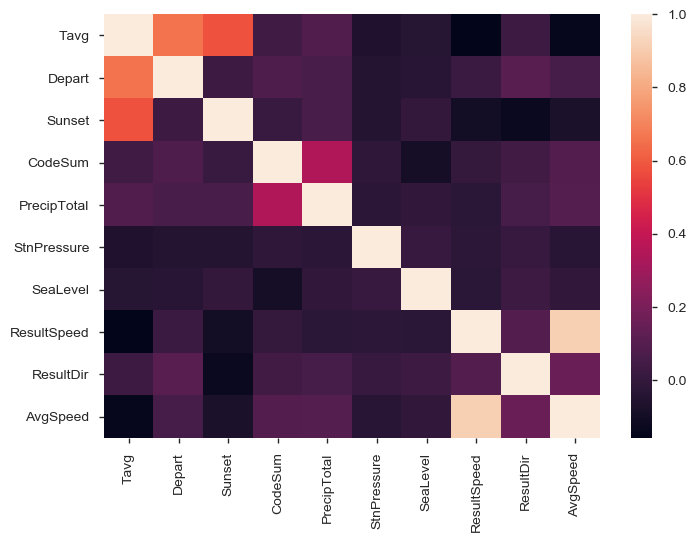

In [62]:
sns.heatmap(weather.corr())

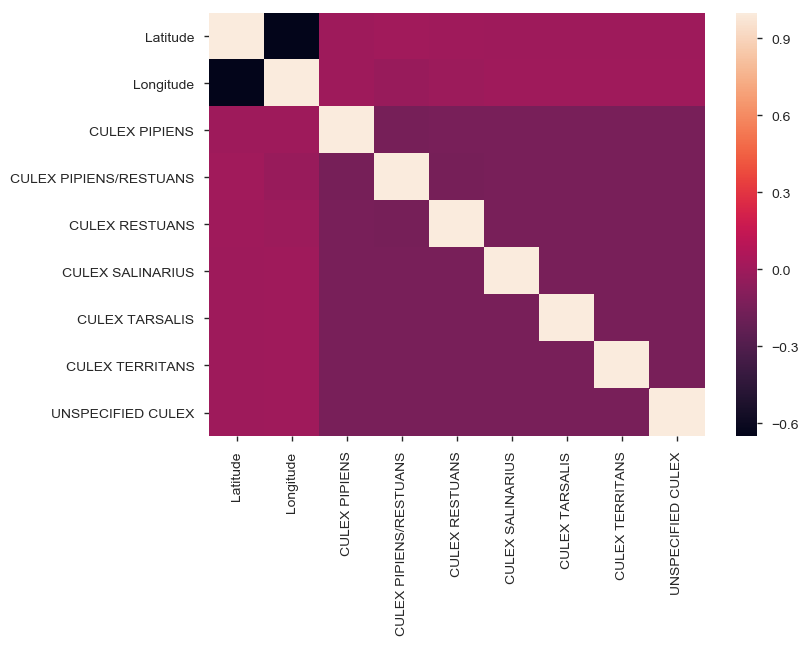

In [63]:
sns.heatmap(test.corr())

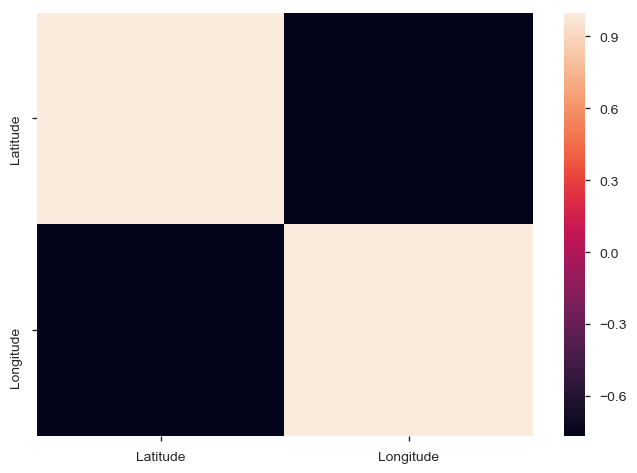

In [64]:
sns.heatmap(spray.corr())

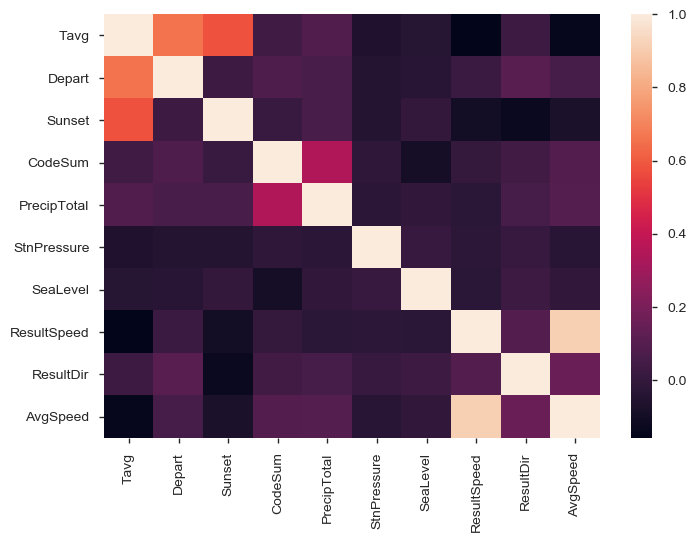

In [65]:
sns.heatmap(weather.corr())